In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [2]:
resume_df = pd.read_csv(r"C:\Users\Yash\Desktop\ExcelR Project\P393\Jupyter\Raw_Resume.csv")

In [3]:
resume_df.head()

Resume        Type
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
1  G. Ananda Rayudu \n\n\t\t       https://www.li...  PeopleSoft
2  PeopleSoft Database Administrator\n\n         ...  PeopleSoft
3  Classification: Internal\n\nClassification: In...  PeopleSoft
4  Priyanka Ramadoss\n\n\t61/46, MountPleasant, \...  PeopleSoft

In [4]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Resume  78 non-null     object
 1   Type    78 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [5]:
resume_df.isna().sum()

Resume    0
Type      0
dtype: int64

In [6]:
resume_df.duplicated().sum()

0

In [7]:
resume_df.Type.value_counts()

Type
React Developer    24
Workday            21
PeopleSoft         19
SQL Developer      14
Name: count, dtype: int64

In [8]:
def cleanResume(txt):
    cleantxt = re.sub('http\S+',' ',txt)
    cleantxt = re.sub('@\S+',' ',cleantxt)
    cleantxt = re.sub('RT|cc',' ',cleantxt)
    cleantxt = re.sub('#\S+s',' ',cleantxt)
    cleantxt = re.sub('[%s]' % re.escape("""!"#$%&'*()+,-./:;<=>?@[\]^_{|}~"""),' ',cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]',' ',cleantxt)
    cleantxt = re.sub('\s+',' ',cleantxt)
    
    return cleantxt

In [9]:
resume_df['Resume'] = resume_df['Resume'].apply(lambda x: cleanResume(x))

In [10]:
resume_df.head()

Resume        Type
0  Anubhav Kumar Singh Core Competencies Scriptin...  PeopleSoft
1  G Ananda Rayudu G Ananda Rayudu Profile Summar...  PeopleSoft
2  PeopleSoft Database Administrator Gangareddy P...  PeopleSoft
3  Classification Internal Classification Interna...  PeopleSoft
4  Priyanka Ramadoss 61 46 MountPleasant Coonoor ...  PeopleSoft

In [11]:
React_resume = resume_df[resume_df['Type'] == 'React Developer']
SQL_resume = resume_df[resume_df['Type'] == 'SQL Developer']
Workday_resume = resume_df[resume_df['Type'] == 'Workday']
Peoplesoft_resume = resume_df[resume_df['Type'] == 'PeopleSoft']

In [12]:
React_resume.reset_index(inplace=True)
React_resume.drop(['index'], axis=1,inplace=True)
React_resume.head()

Resume             Type
0  Name Ravali P Curriculum Vitae Specialization ...  React Developer
1  SUSOVAN BAG Seeking a challenging position in ...  React Developer
2  Kanumuru Deepak Reddy CAREER OBJECTIVE To secu...  React Developer
3  HARIPRIYA BATTINA Experience as UI Developer i...  React Developer
4  KAMALAKAR REDDY A Linked In PROFESSIONAL SUMMA...  React Developer

In [13]:
React_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Resume  24 non-null     object
 1   Type    24 non-null     object
dtypes: object(2)
memory usage: 516.0+ bytes


In [14]:
SQL_resume.reset_index(inplace=True)
SQL_resume.drop(['index'], axis=1,inplace=True)
SQL_resume.head()

Resume           Type
0  ANIL KUMAR MADDUKURI SQL MSBI Developer Summar...  SQL Developer
1  Aradhana Tripathi Current Location Gachibowli ...  SQL Developer
2  BUDDHA VAMSI CAREER OBJECTIVE Have 2 11 years ...  SQL Developer
3  KAMBALLA PRADEEP SYNOPSIS Looking forward to a...  SQL Developer
4   Hyderabad Nazeer Basha SQL and Power BI Devel...  SQL Developer

In [15]:
SQL_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Resume  14 non-null     object
 1   Type    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


In [16]:
Workday_resume.reset_index(inplace=True)
Workday_resume.drop(['index'], axis=1,inplace=True)
Workday_resume.head()

Resume     Type
0  Chinna Subbarayudu M DOB 06th March 1994 Natio...  Workday
1  Name Gopi Krishna Reddy PROFESSIONAL SUMMERY W...  Workday
2  Hari Krishna M Summary A result oriented profe...  Workday
3  Harikrishna Akula Summary 5 2 years of IT expe...  Workday
4  HIMA MENDU Career Objective To continue growin...  Workday

In [17]:
Workday_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Resume  21 non-null     object
 1   Type    21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


In [18]:
Peoplesoft_resume.reset_index(inplace=True)
Peoplesoft_resume.drop(['index'], axis=1,inplace=True)
Peoplesoft_resume.head()

Resume        Type
0  Anubhav Kumar Singh Core Competencies Scriptin...  PeopleSoft
1  G Ananda Rayudu G Ananda Rayudu Profile Summar...  PeopleSoft
2  PeopleSoft Database Administrator Gangareddy P...  PeopleSoft
3  Classification Internal Classification Interna...  PeopleSoft
4  Priyanka Ramadoss 61 46 MountPleasant Coonoor ...  PeopleSoft

In [19]:
Peoplesoft_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Resume  19 non-null     object
 1   Type    19 non-null     object
dtypes: object(2)
memory usage: 436.0+ bytes


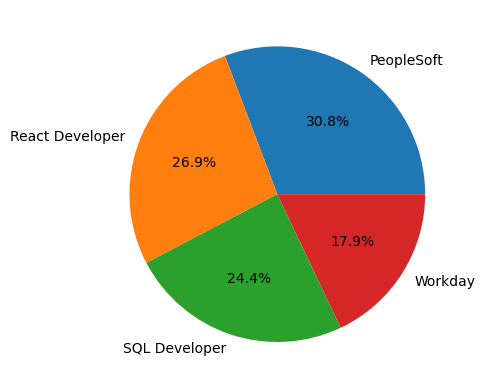

In [20]:
count = resume_df.Type.value_counts()
unique = resume_df.Type.unique()
plt.pie(count,labels=unique,autopct='%1.1f%%');

# React Developer

In [21]:
# React_resume.Resume[0]

In [22]:
# experience_pattern = r"(?: EXPERIENCE|Employment experience)\n(.*?)\ n(?:Skills|Education)"

In [23]:
# experience_match = re.search(experience_pattern, React_resume.Resume[4], re.DOTALL)
# experience_match

In [24]:
# def extract_skills_experience_dob(resume):
#     skills_section_patterns = [
#         r"MANUAL TESTING SKILLS(.+?)(?=\bS QL S K I LL S\b|\bAGILE METHDOLOGY\b|\bJAVA SKILLS\b)",
#         r"S QL S K I LL S(.+?)(?=\bAGILE METHDOLOGY\b|\bJAVA SKILLS\b|\bACADEMIC PROJECTS\b)",
#         r"AGILE METHDOLOGY(.+?)(?=\bJAVA SKILLS\b|\bACADEMIC PROJECTS\b)",
#         r"JAVA SKILLS(.+?)(?=\bACADEMIC PROJECTS\b)"
#     ]

#     skills = []
#     for pattern in skills_section_patterns:
#         match = re.search(pattern, resume, re.DOTALL)
#         if match:
#             skills.append(match.group(1).strip().replace('\n', ' '))

#     experience_pattern = r"INDUSTRIAL EXPOSURE(.+?)(?=\bACHIEVEMENTS\b)"
#     experience_match = re.search(experience_pattern, resume, re.DOTALL)
#     experience = experience_match.group(1).strip().replace('\n', ' ') if experience_match else ""

#     dob_pattern = r"DATE OF BI H (\d{2} \d{2} \d{4})"
#     dob_match = re.search(dob_pattern, resume)
#     dob = dob_match.group(1) if dob_match else ""

#     return {
#         "skills": skills,
#         "experience": experience,
#         "date_of_birth": dob
#     }

In [25]:
# React_resume.Resume[1]

In [26]:
# React_resume.Resume[2]

In [27]:
# resume = React_resume.Resume[2]
# extract_skills_experience_dob(resume)

In [28]:
# for i in range(len(React_resume.Resume)):
#     extract_skills_experience_dob(React_resume.Resume[i])

In [29]:
# TextBlob(React_resume['Resume'][1]).ngrams(1)[:20]

In [30]:
# TextBlob(React_resume['Resume'][1]).ngrams(2)[:20]

In [31]:
# TextBlob(React_resume['Resume'][1]).ngrams(3)[:20]

In [32]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(React_resume['Resume'])
count_values = ngrams.toarray().sum(axis=0)
vocab = countvec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [33]:
df_ngram.head(15)

Frequency Unigram_Bigram
0         145          react
1         121             js
2         100       react js
3          95     experience
4          84          using
5          77            web
6          75        project
7          70     javascript
8          69      developer
9          64      knowledge
10         58             ui
11         57         skills
12         57           html
13         53    application
14         49   technologies

In [34]:
df_ngram.tail(15)

Frequency Unigram_Bigram
7387          1        05 2021
7388          1        05 2018
7389          1          05 09
7390          1          04 11
7391          1          03 zp
7392          1        03 2021
7393          1        03 2020
7394          1        03 2018
7395          1        03 2014
7396          1        03 2012
7397          1        03 1997
7398          1        02 2019
7399          1             02
7400          1        01 2019
7401          1             01

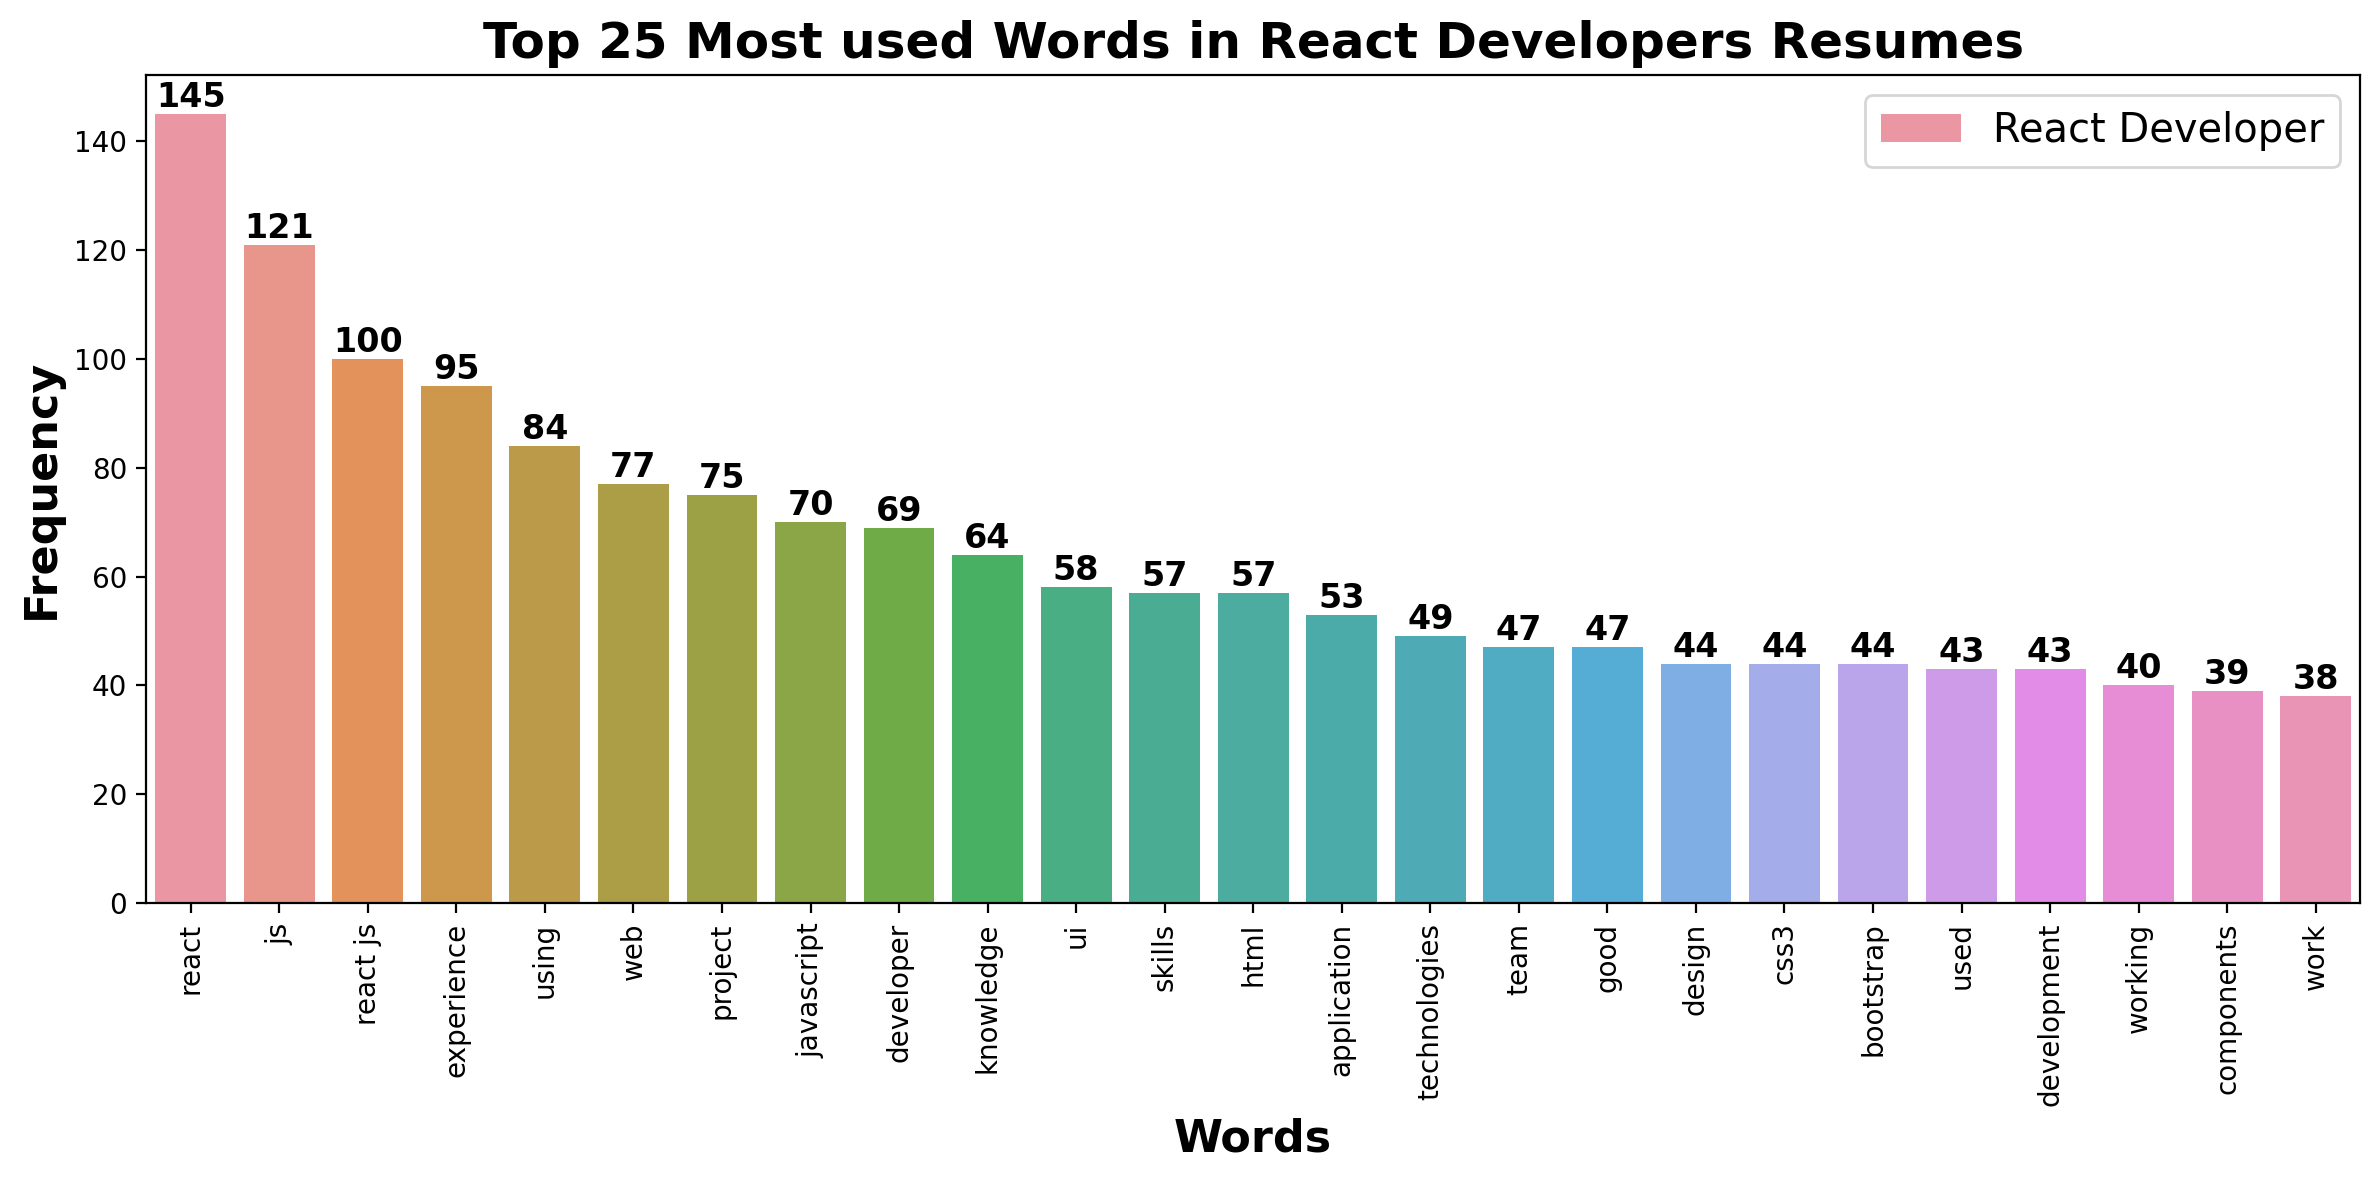

In [35]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=React_resume, ax = axe,
            label='React Developer'.format(len(React_resume.Type.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in React Developers Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

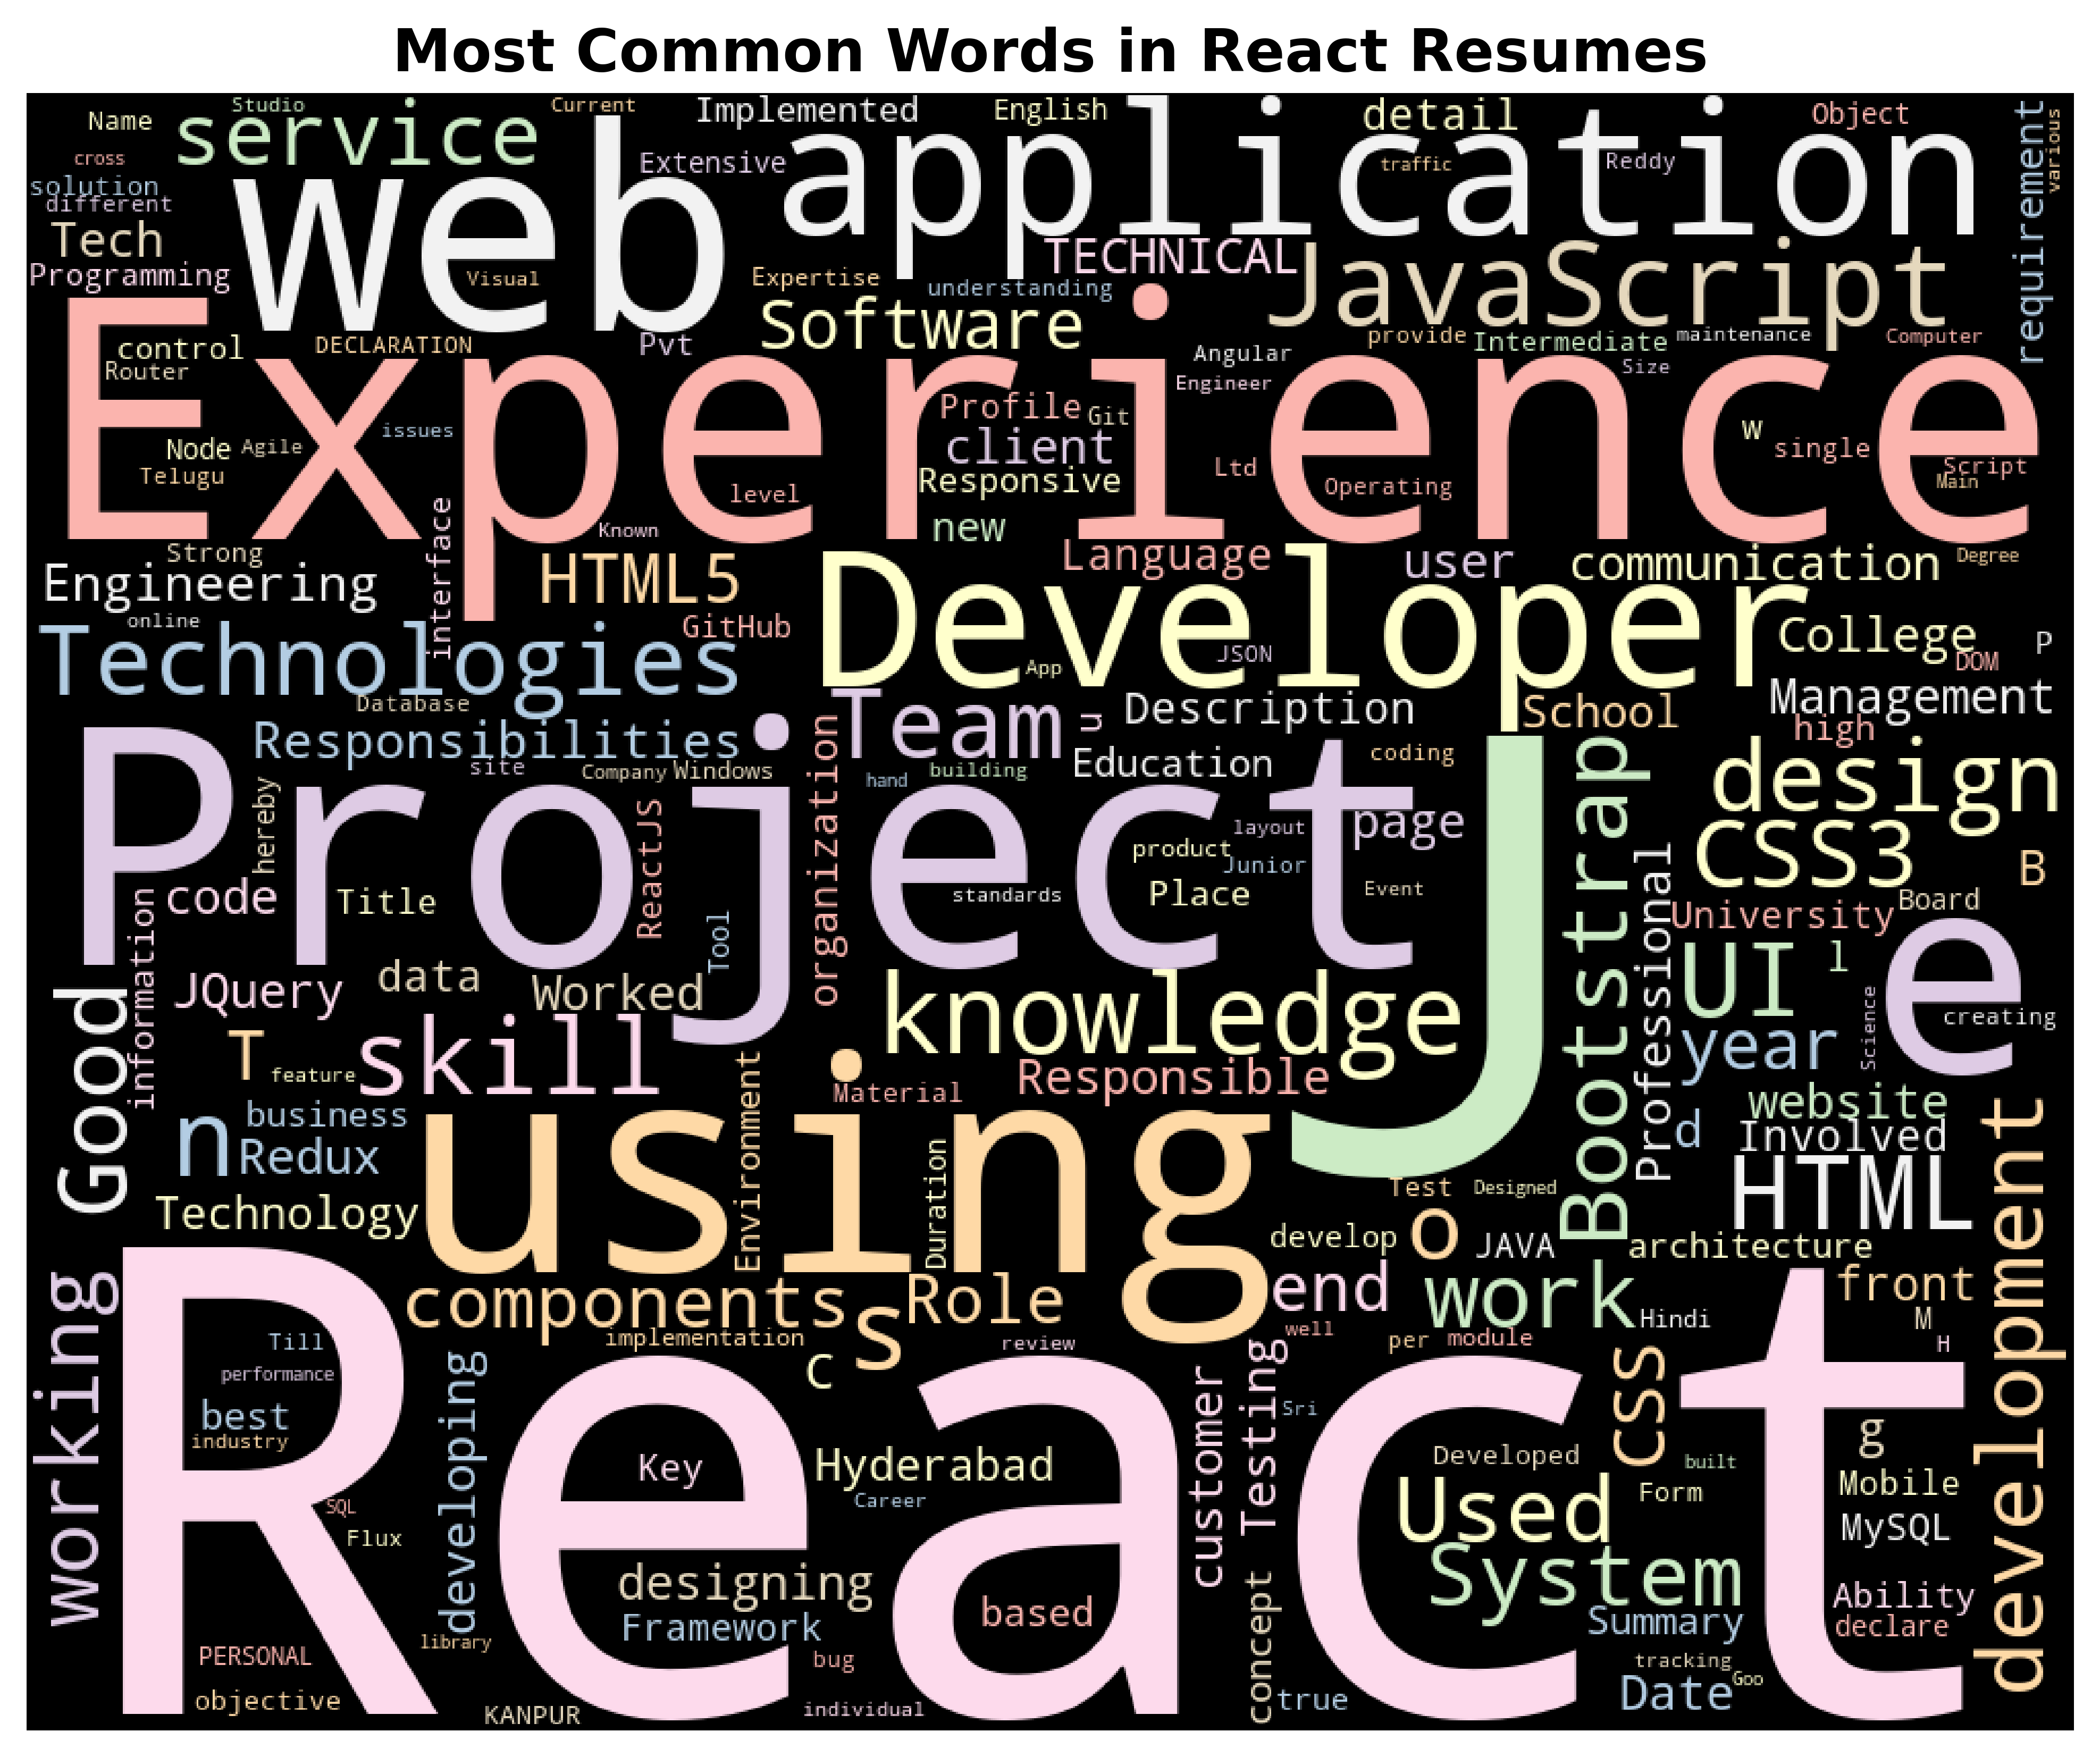

In [36]:
text = " ".join(cat for cat in React_resume.Resume)

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500)
plt.title('Most Common Words in React Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# SQL Developer 

In [37]:
# TextBlob(SQL_resume['Resume'][1]).ngrams(1)[:20]

In [38]:
# TextBlob(SQL_resume['Resume'][1]).ngrams(2)[:20]

In [39]:
# TextBlob(SQL_resume['Resume'][1]).ngrams(3)[:20]

In [40]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(SQL_resume['Resume'])
count_values = ngrams.toarray().sum(axis=0)
vocab = countvec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [41]:
df_ngram.head(15)

Frequency Unigram_Bigram
0         227            sql
1         122           data
2         108         server
3         103     sql server
4         103     experience
5          82          using
6          62        reports
7          61      functions
8          59       database
9          53        project
10         50        queries
11         48         tables
12         45      knowledge
13         45       business
14         45             bi

In [42]:
df_ngram.tail(15)

Frequency  Unigram_Bigram
6220          1         11g 18c
6221          1         11g 12c
6222          1        11 years
6223          1              11
6224          1        10 years
6225          1   10 relational
6226          1       10 months
6227          1     10 duration
6228          1         10 dbms
6229          1   10 candidates
6230          1  10 application
6231          1         08 1994
6232          1              08
6233          1        04th feb
6234          1            04th

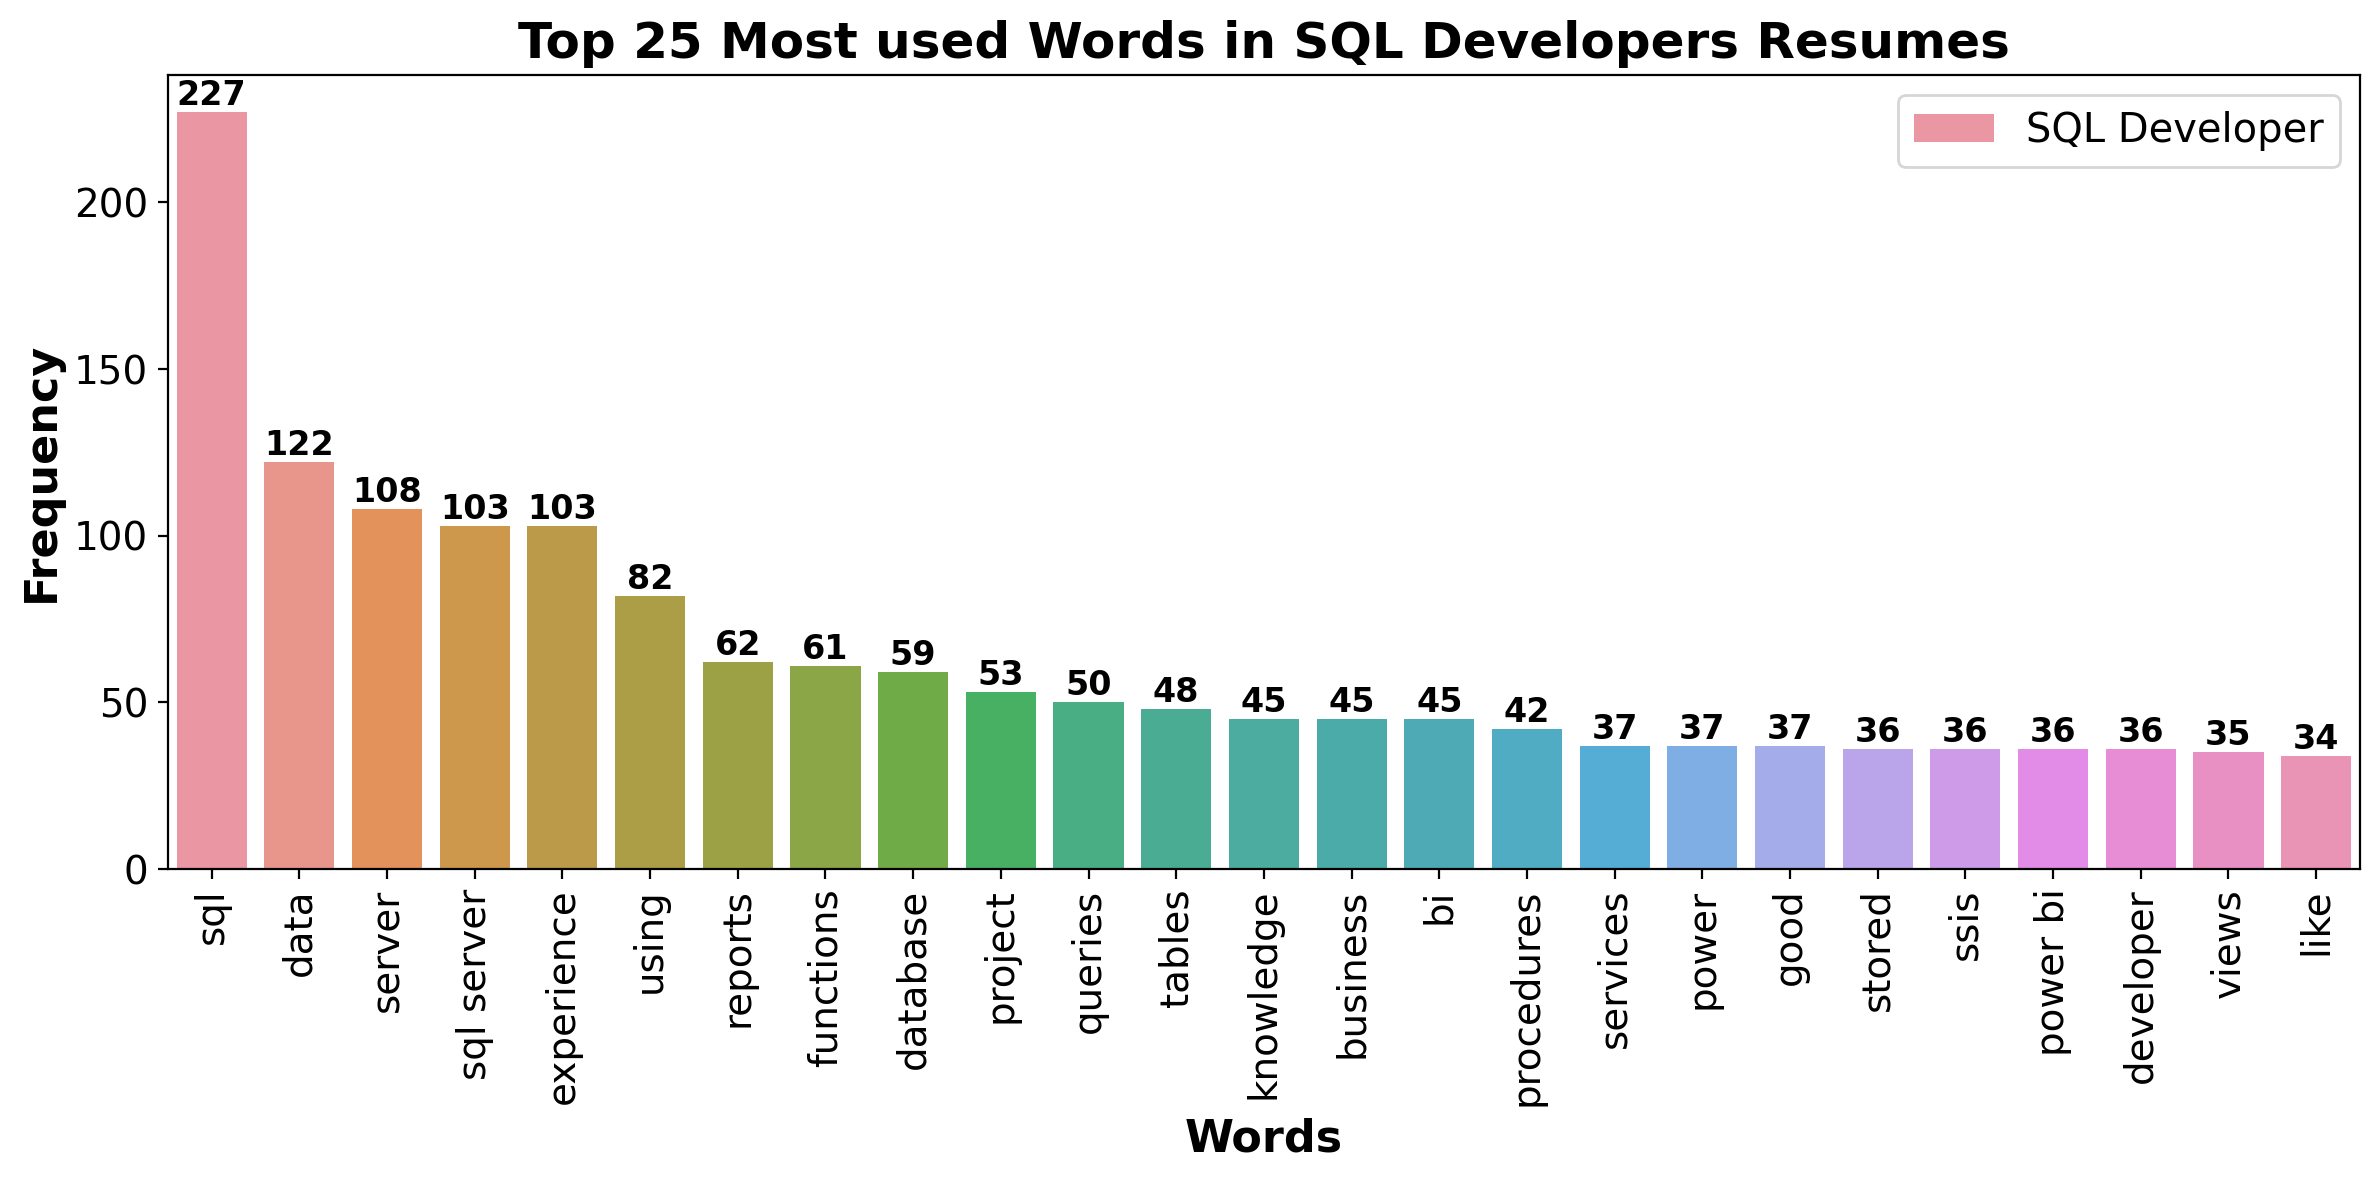

In [43]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=SQL_resume, ax = axe,
            label='SQL Developer'.format(len(SQL_resume.Type.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in SQL Developers Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

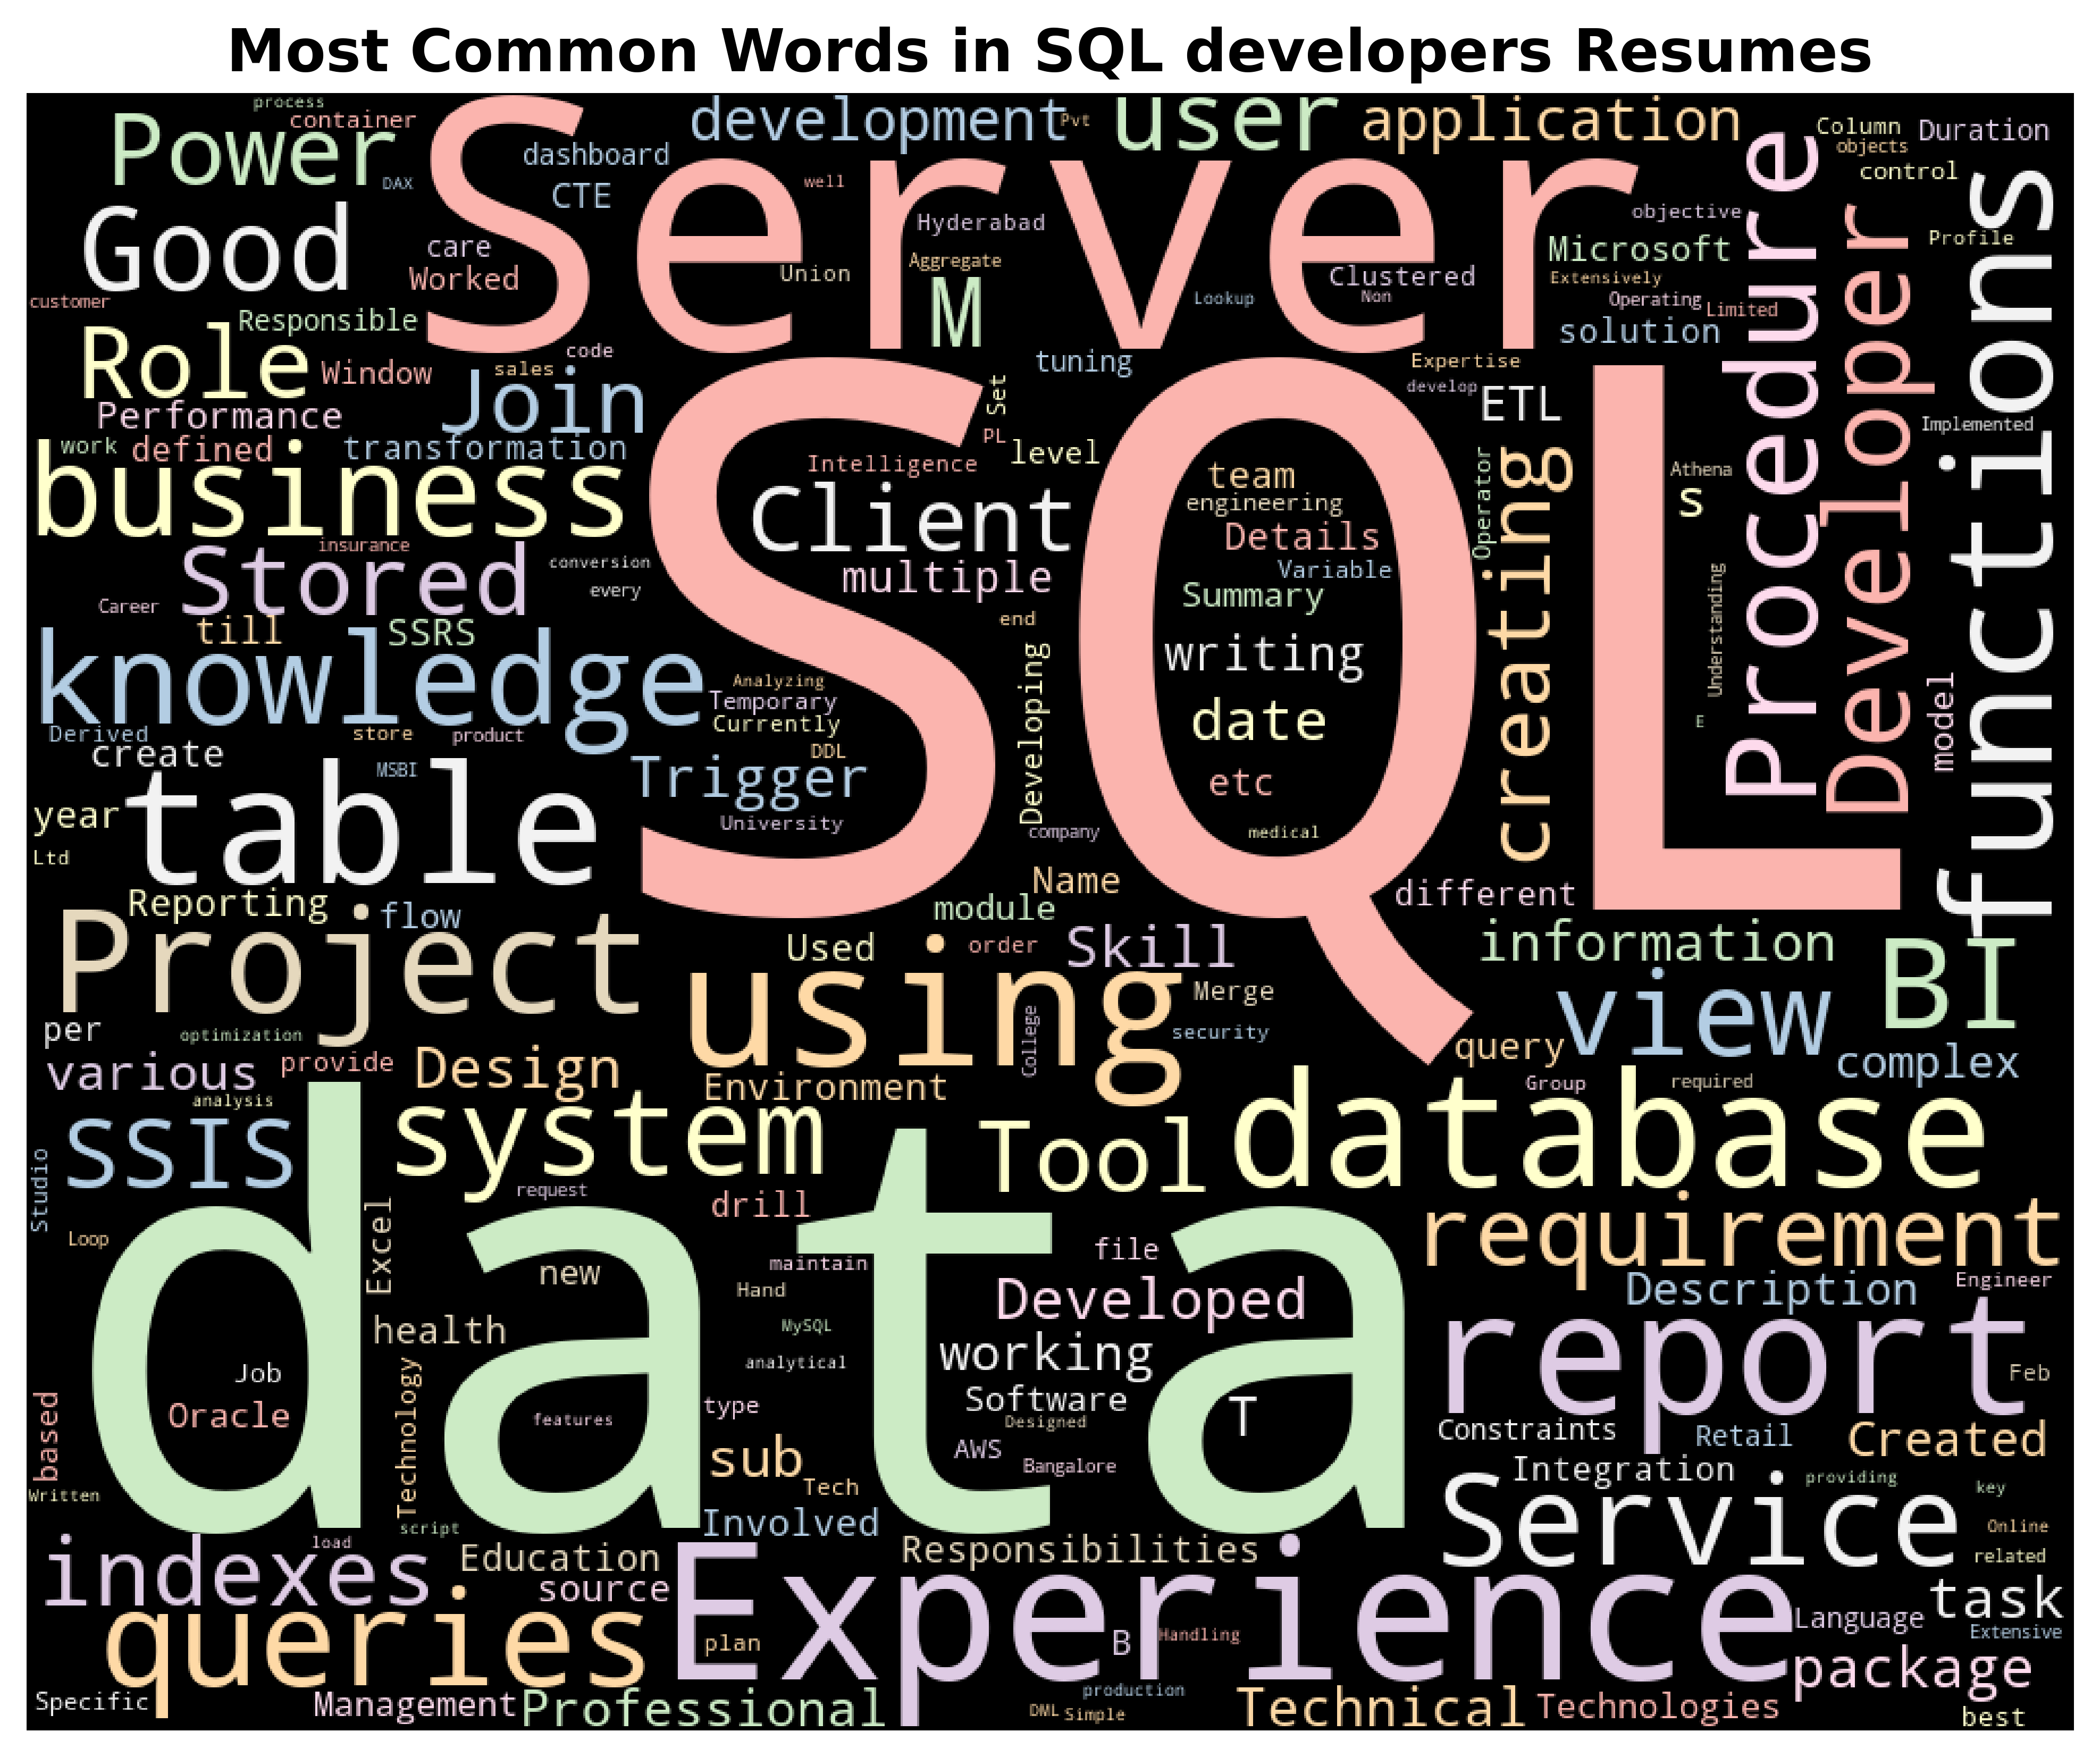

In [44]:
text = " ".join(cat for cat in SQL_resume.Resume)

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500)
plt.title('Most Common Words in SQL developers Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Workday

In [45]:
# TextBlob(Workday_resume['Resume'][1]).ngrams(1)[:20]

In [46]:
# TextBlob(Workday_resume['Resume'][1]).ngrams(2)[:20]

In [47]:
# TextBlob(Workday_resume['Resume'][1]).ngrams(3)[:20]

In [48]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(Workday_resume['Resume'])
count_values = ngrams.toarray().sum(axis=0)
vocab = countvec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})
df_ngram.head(15)

Frequency Unigram_Bigram
0         432        workday
1         189   integrations
2         186       business
3         176        reports
4         171     experience
5         147          using
6         134            eib
7         119           core
8         116            hcm
9         110         worked
10        108         studio
11        108         report
12        106    integration
13        104         custom
14         98           data

In [49]:
df_ngram.tail(15)

Frequency   Unigram_Bigram
9202          1          10g 11i
9203          1              10g
9204          1         10 years
9205          1            10 th
9206          1  10 professional
9207          1          10 plus
9208          1       10 million
9209          1       06th march
9210          1             06th
9211          1          04 1993
9212          1               04
9213          1          02 1992
9214          1               02
9215          1     000 vehicles
9216          1        000 units

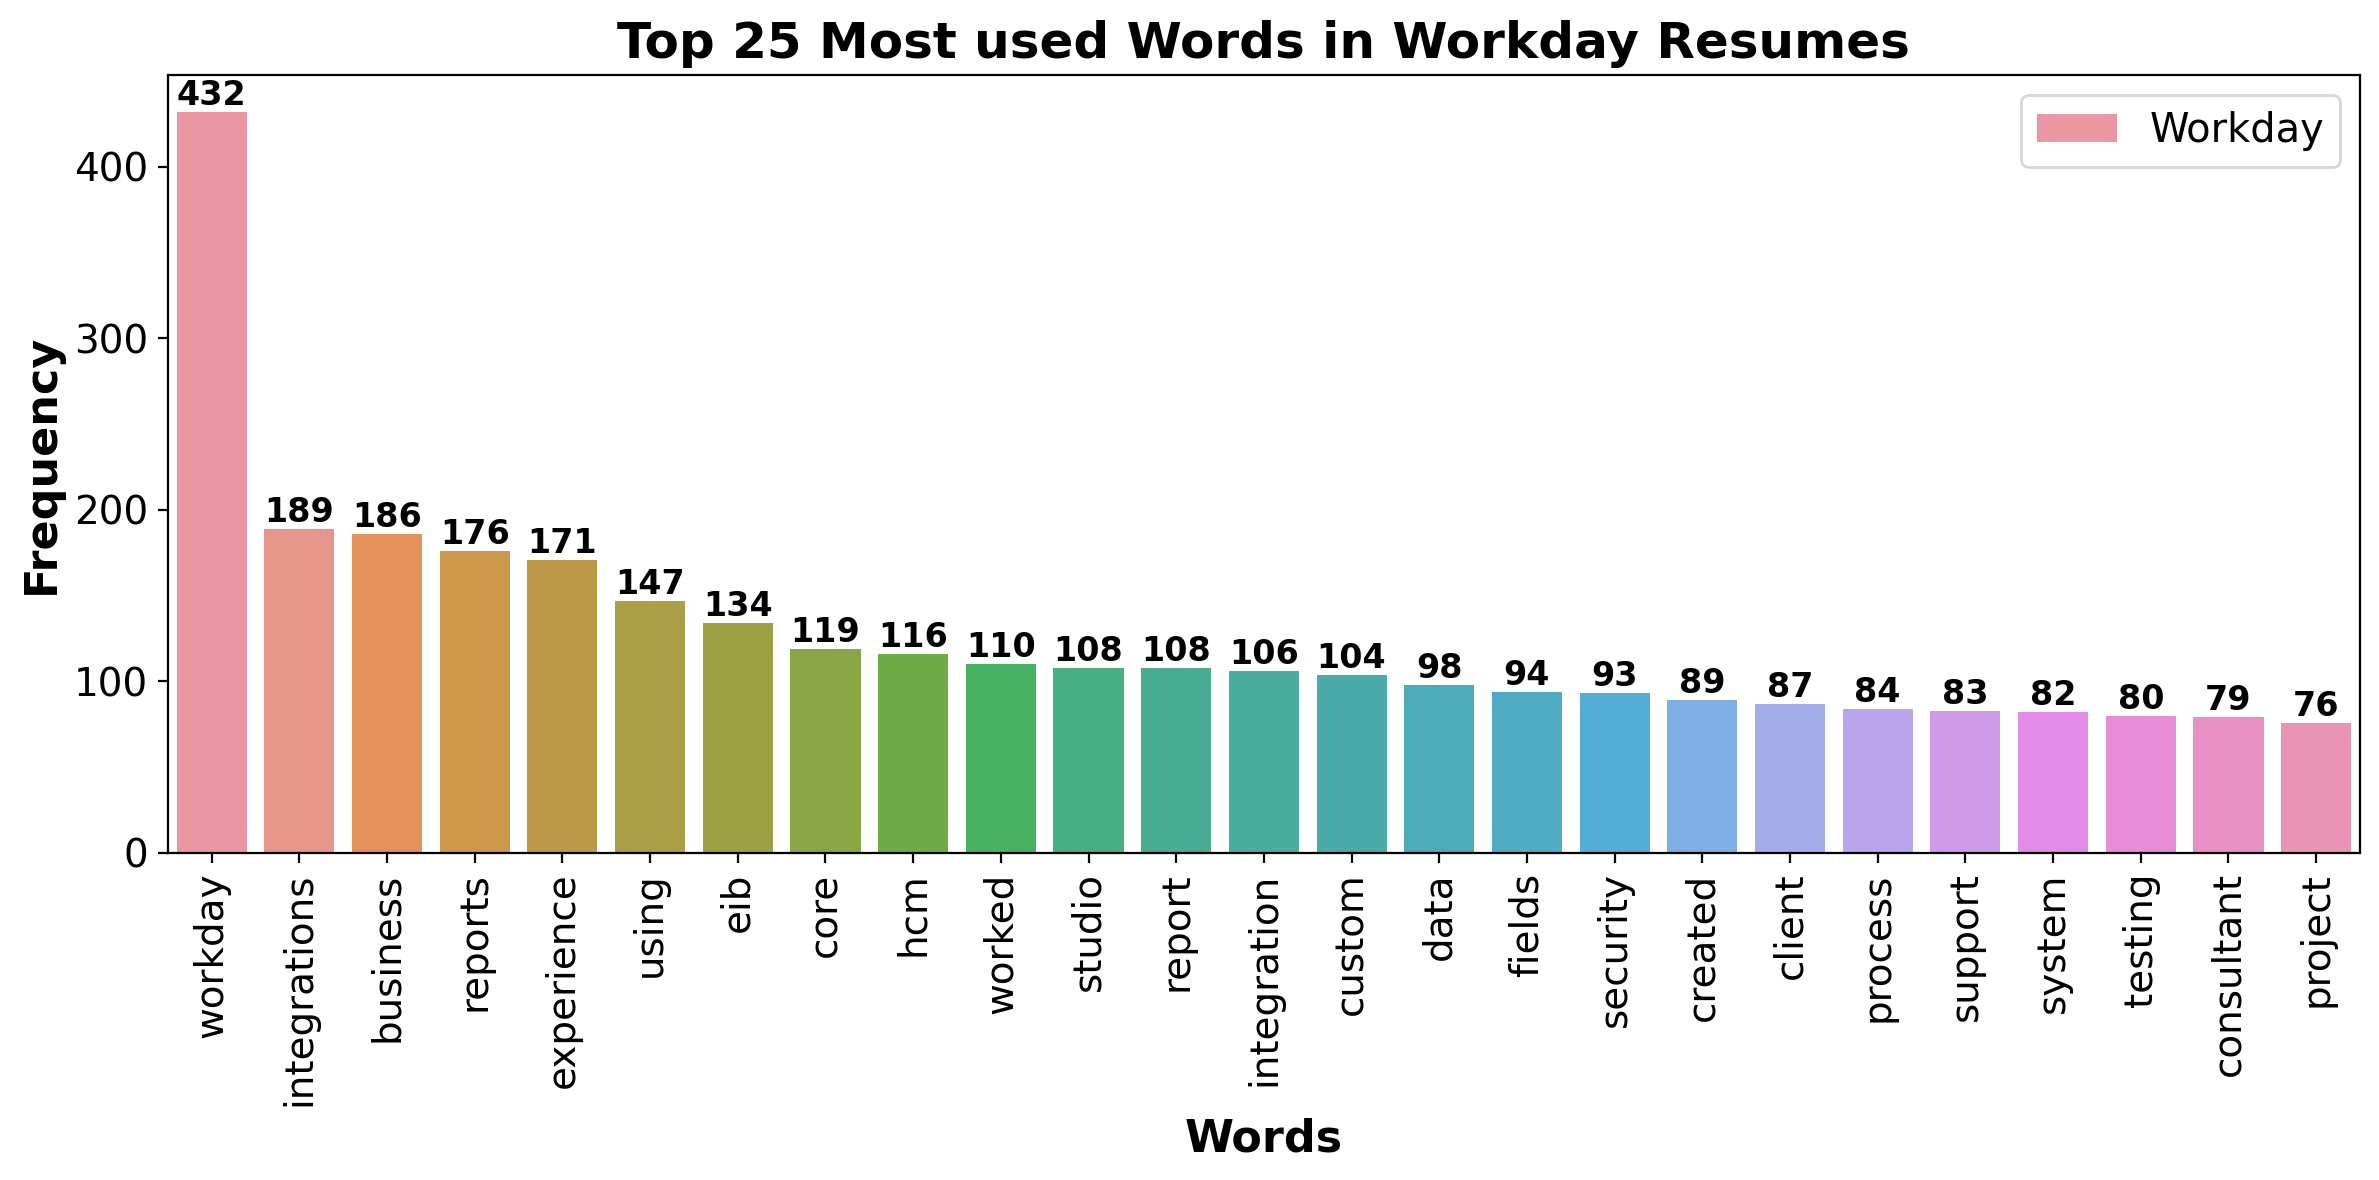

In [50]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=Workday_resume, ax = axe,
            label='Workday'.format(len(Workday_resume.Type.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Workday Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

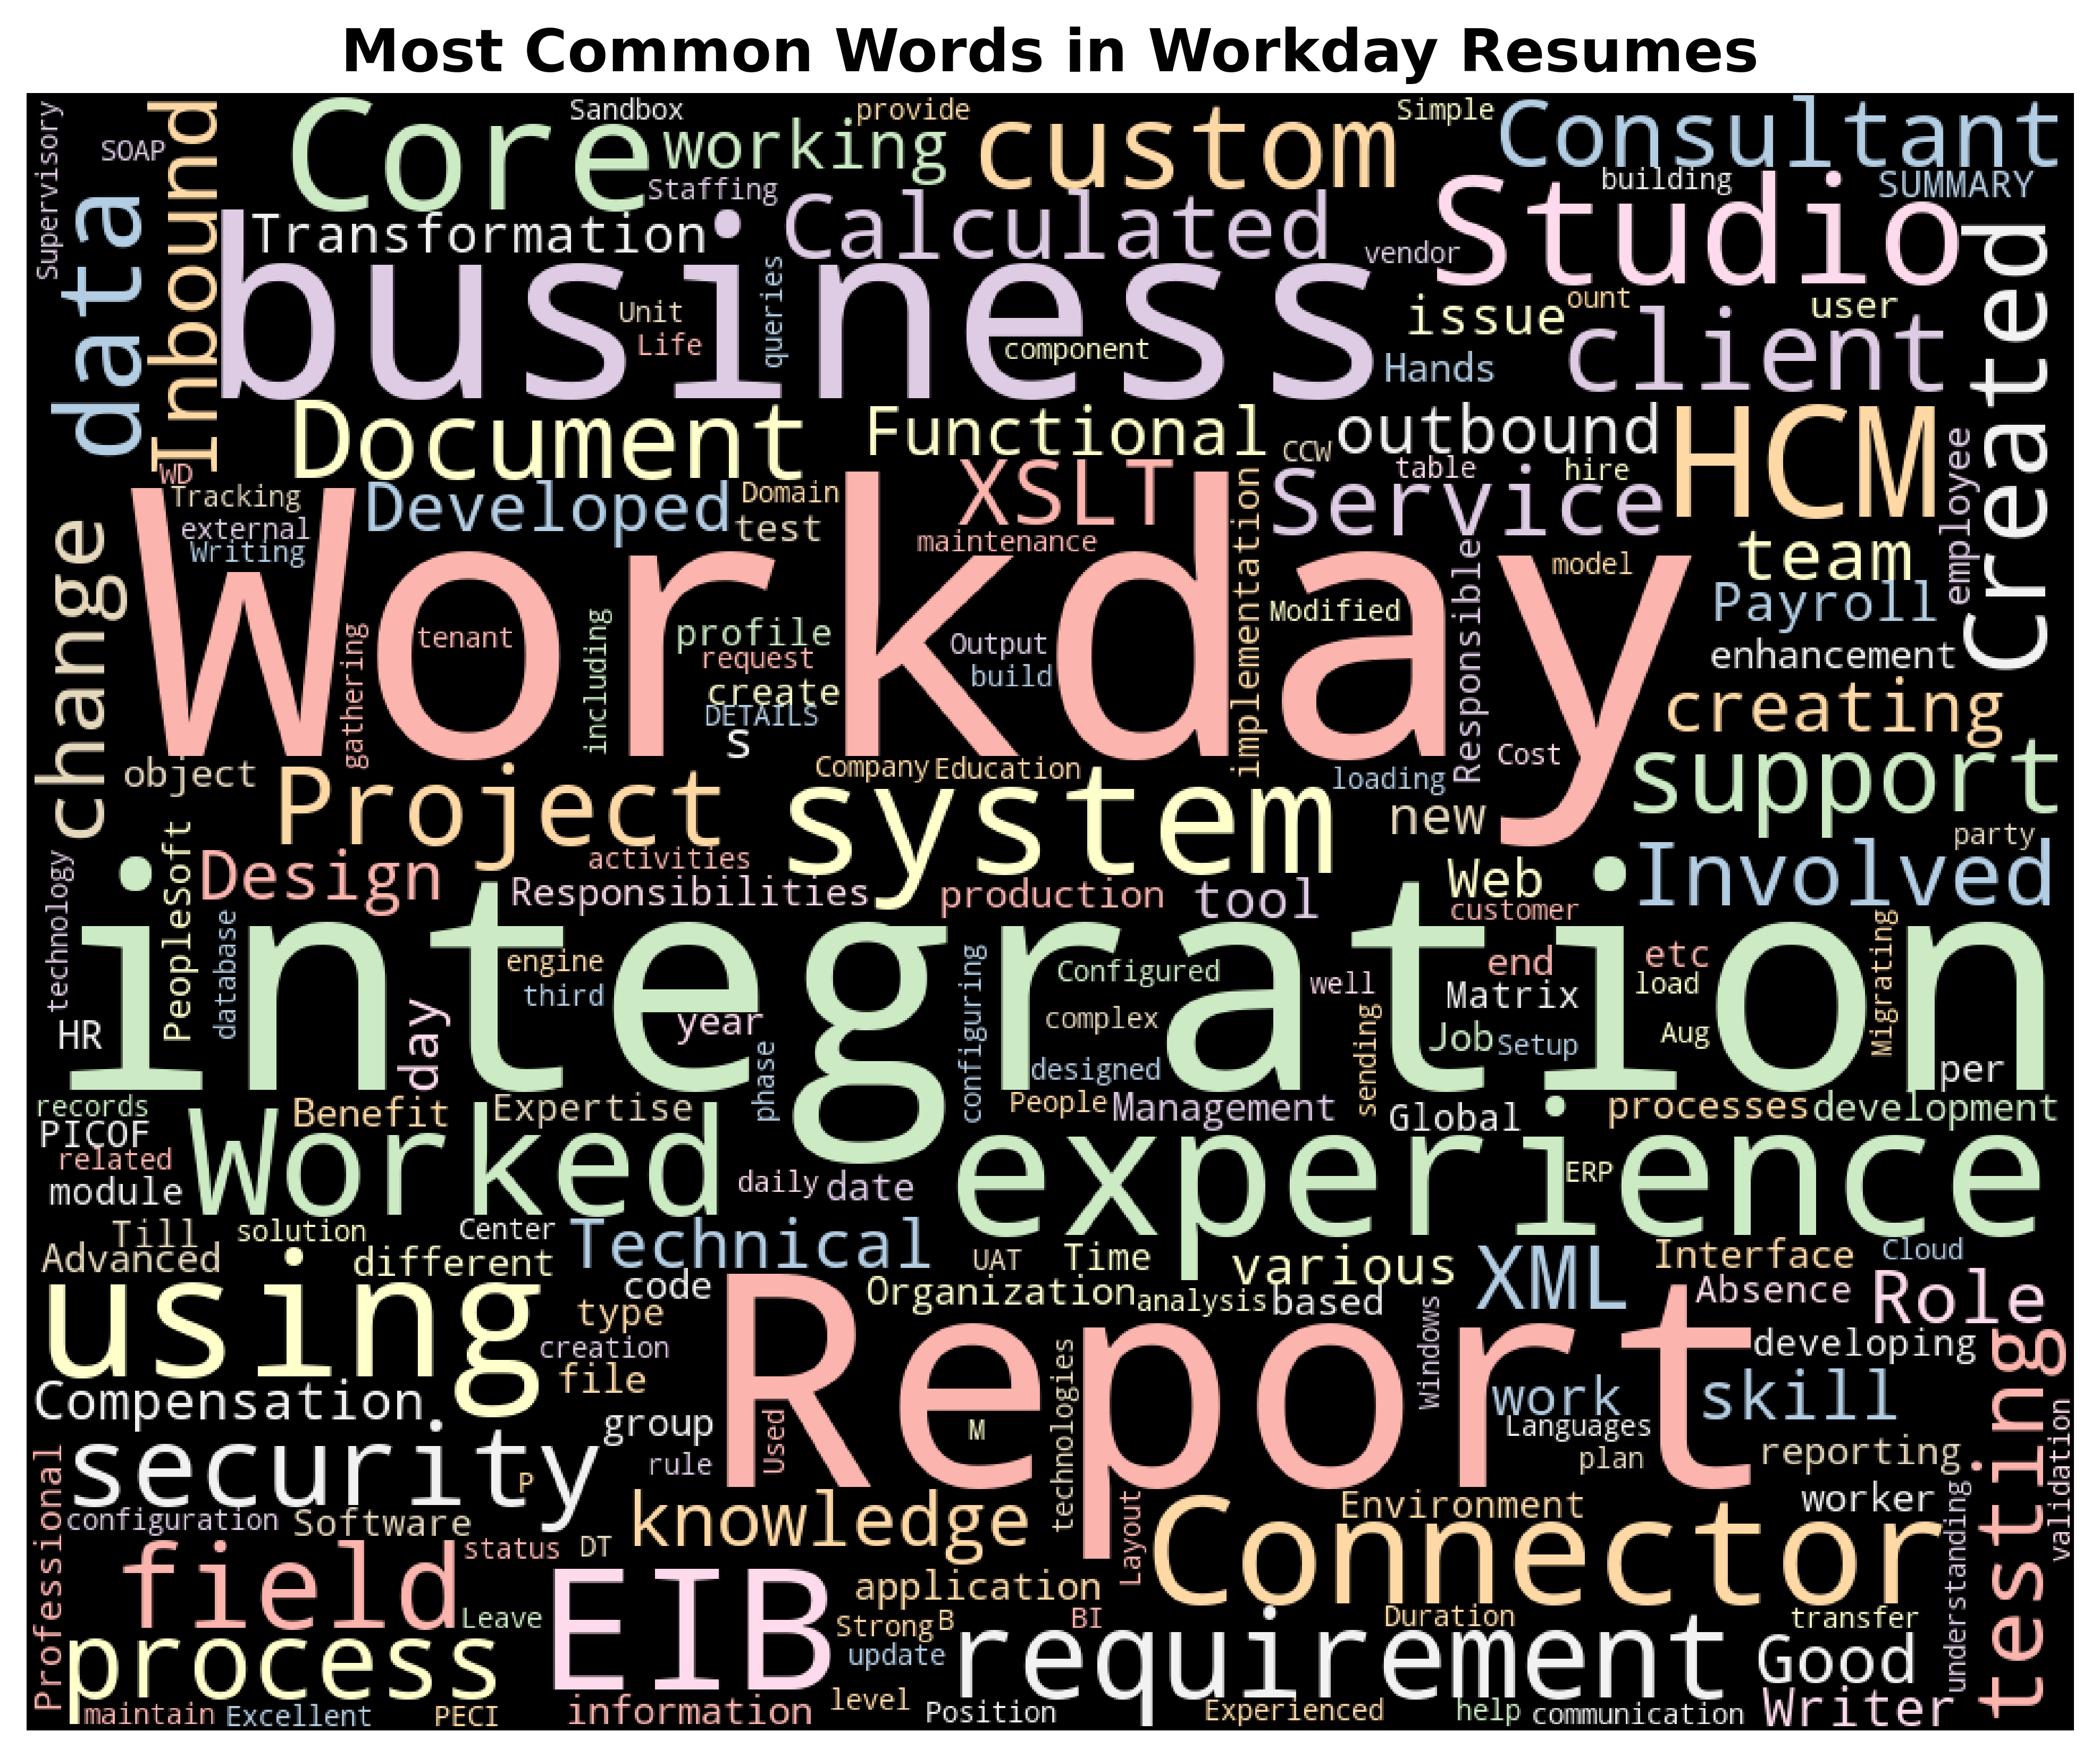

In [51]:
text = " ".join(cat for cat in Workday_resume.Resume)

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500)
plt.title('Most Common Words in Workday Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Peoplesoft

In [52]:
# TextBlob(Peoplesoft_resume['Resume'][1]).ngrams(1)[:20]

In [53]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(Peoplesoft_resume['Resume'])
count_values = ngrams.toarray().sum(axis=0)
vocab = countvec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})
df_ngram.head(15)

Frequency     Unigram_Bigram
0         420         peoplesoft
1         308        application
2         245             server
3         227         experience
4         164           database
5         148            servers
6         141            process
7         132             people
8         118                web
9         116              tools
10        116             oracle
11        113            project
12        110            domains
13        104          scheduler
14        101  process scheduler

In [54]:
df_ngram.tail(15)

Frequency Unigram_Bigram
8930          1        05 1987
8931          1       04th jan
8932          1           04th
8933          1       04 years
8934          1             04
8935          1     032 strong
8936          1            032
8937          1       017 fscm
8938          1            017
8939          1     016 strong
8940          1            016
8941          1        01 1996
8942          1             01
8943          1       006 fscm
8944          1            006

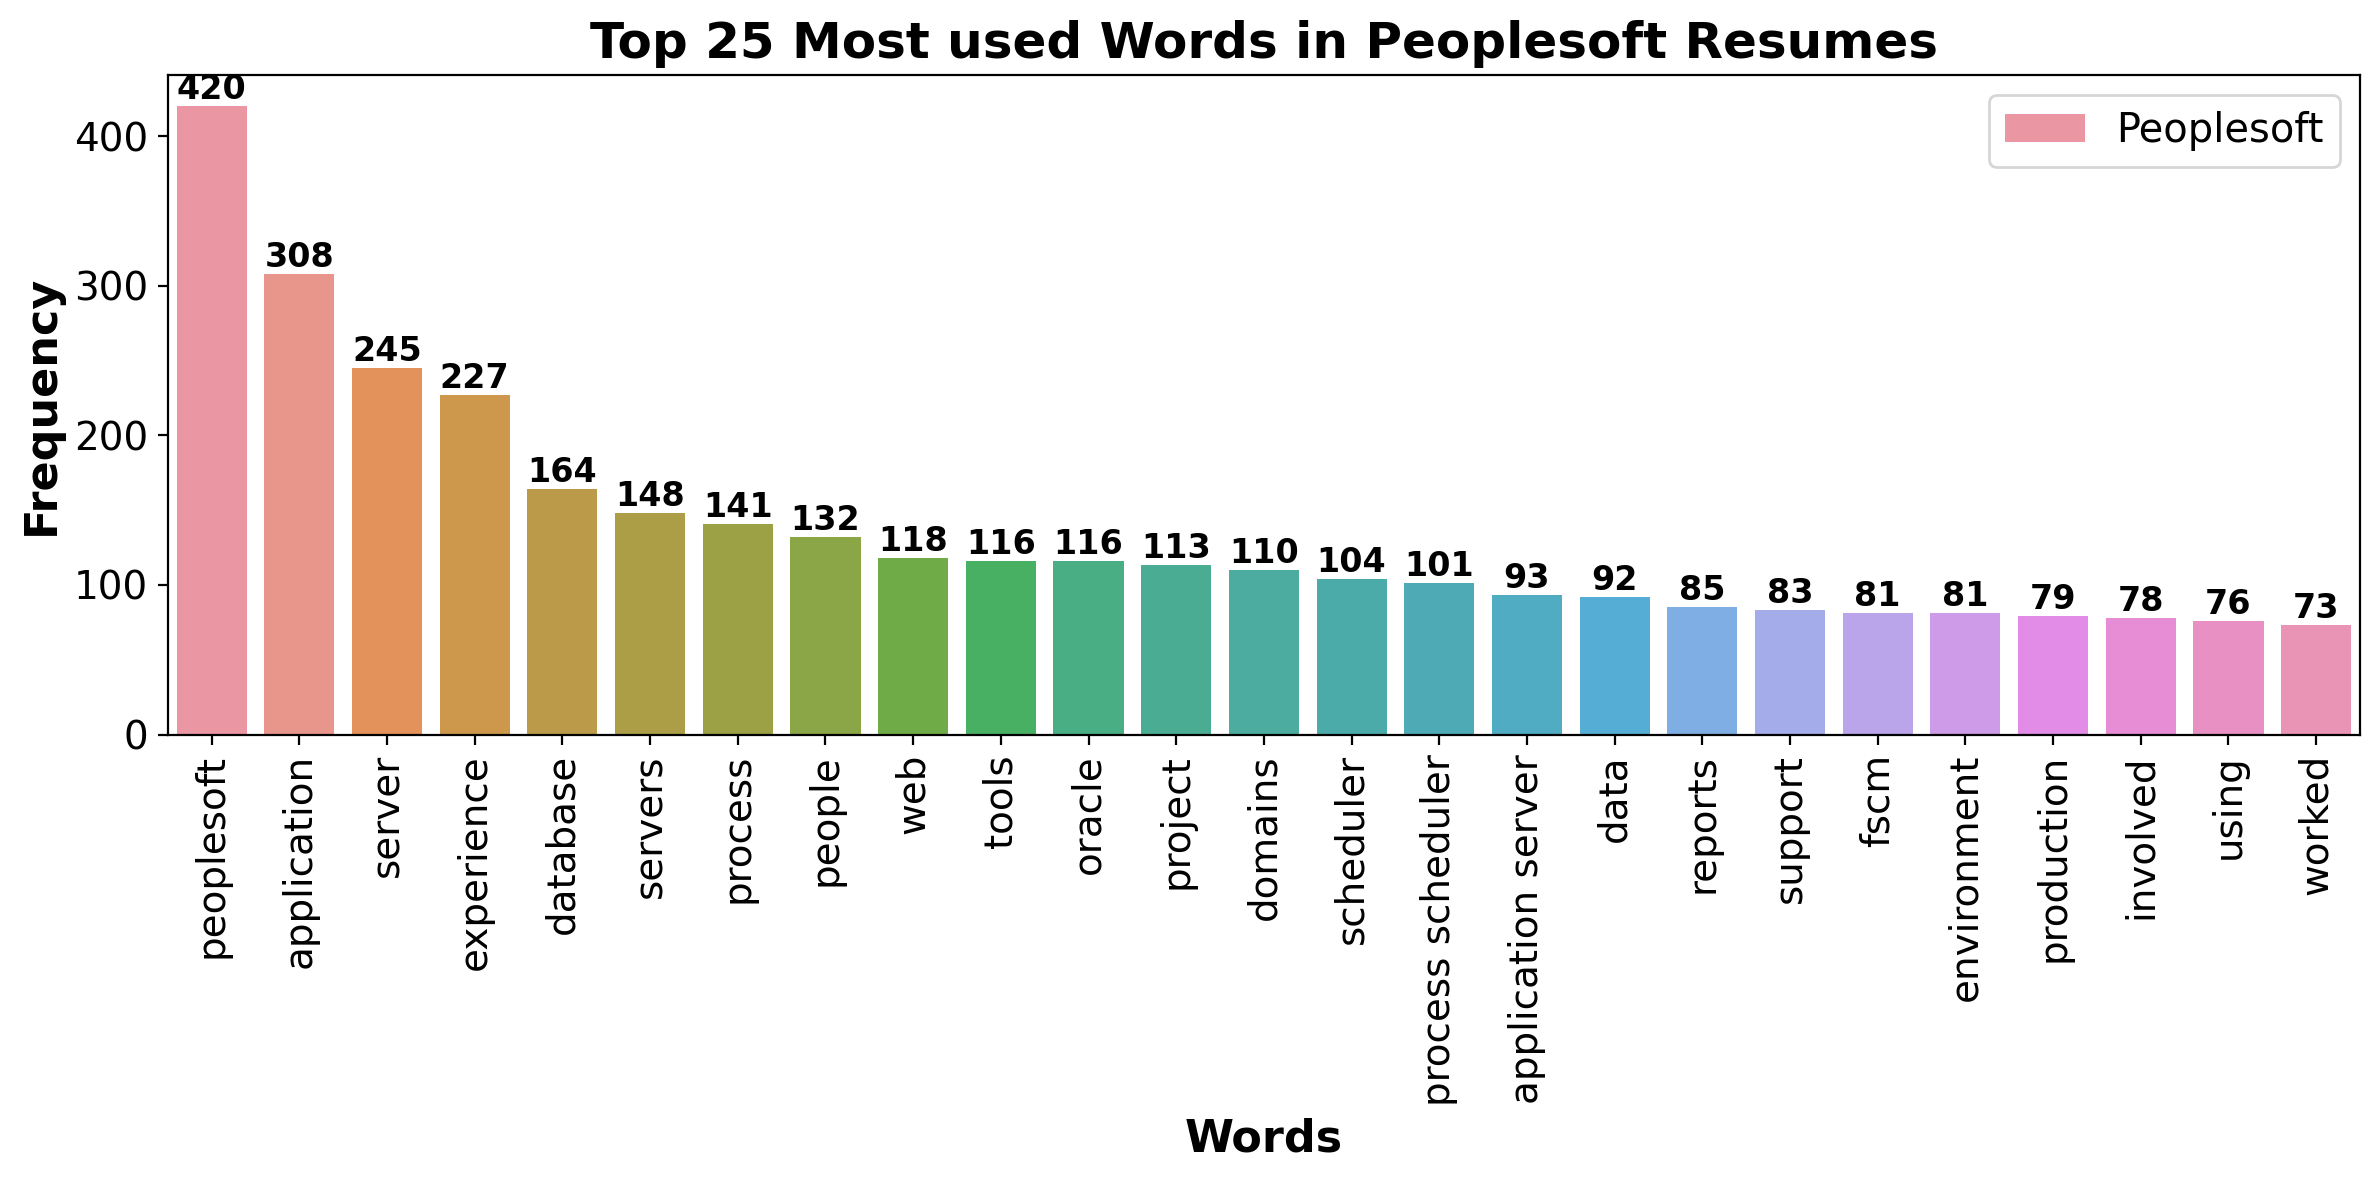

In [55]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=Peoplesoft_resume, ax = axe,
            label='Peoplesoft'.format(len(Peoplesoft_resume.Type.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Peoplesoft Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

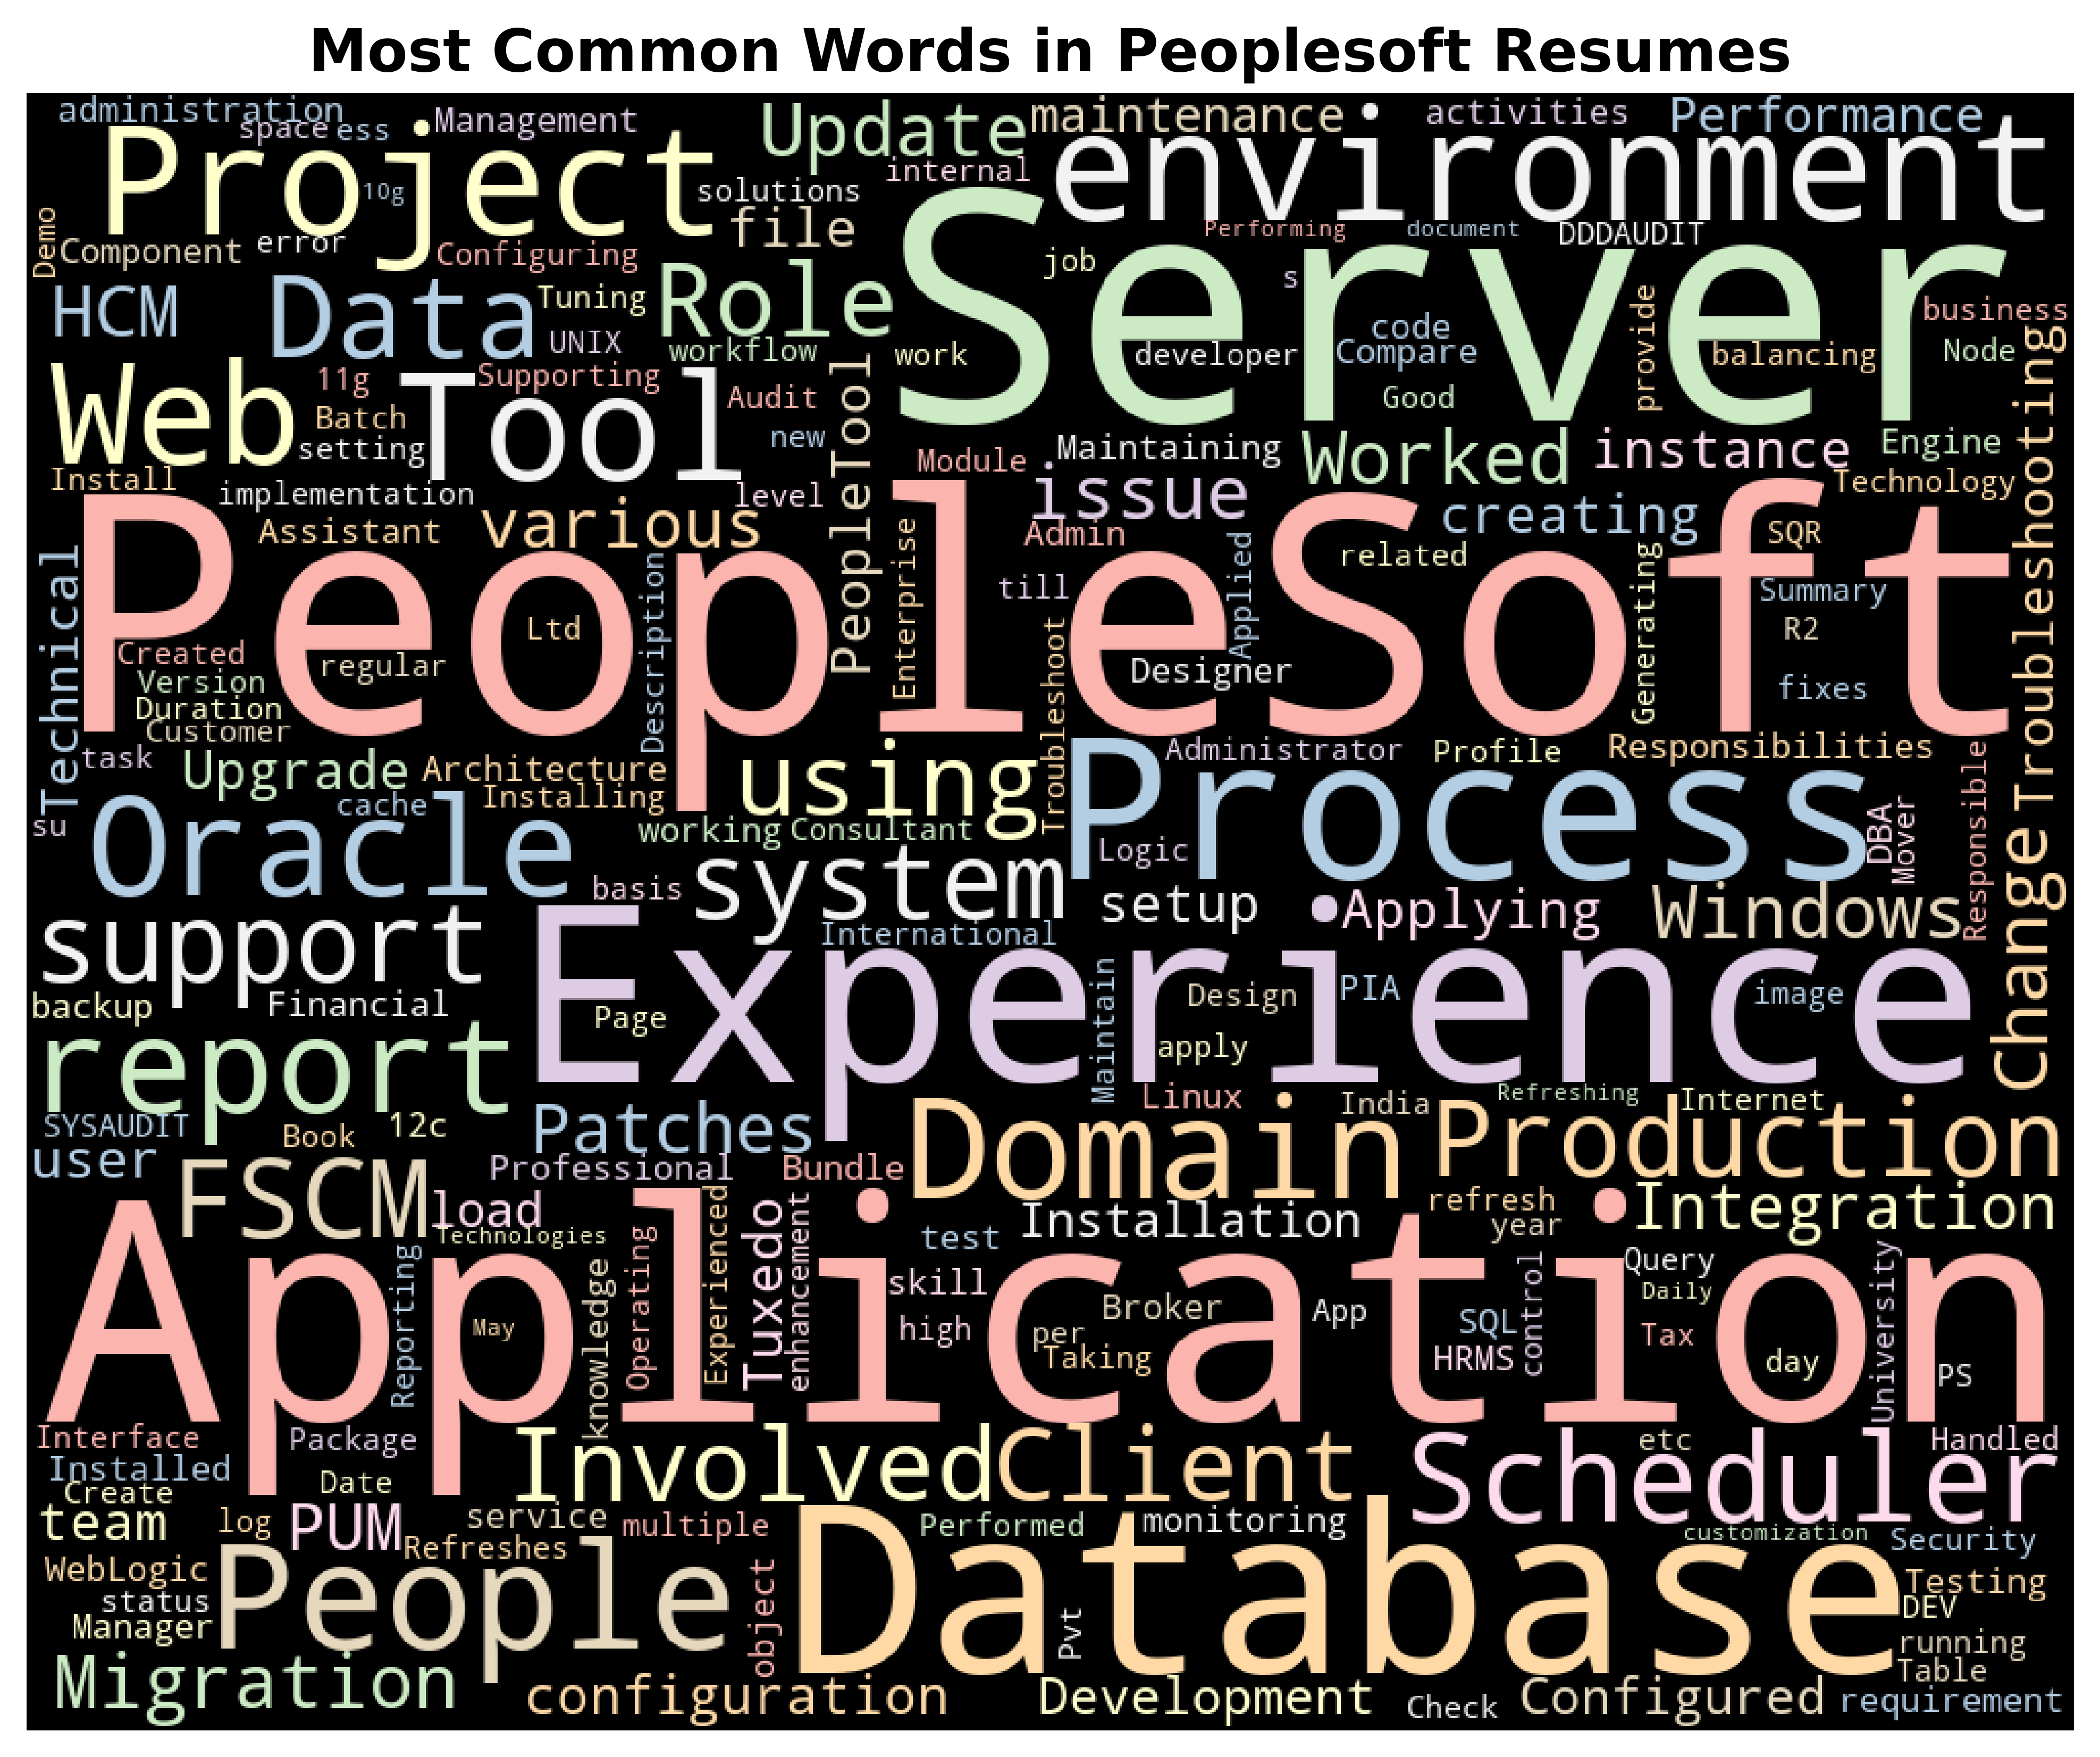

In [56]:
text = " ".join(cat for cat in Peoplesoft_resume.Resume)

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500)
plt.title('Most Common Words in Peoplesoft Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#  TRYING SOMETHING

In [57]:
nltk_tokens = nltk.word_tokenize(React_resume.Resume[0]) 
print(list(nltk.bigrams(nltk_tokens)))

[('Name', 'Ravali'), ('Ravali', 'P'), ('P', 'Curriculum'), ('Curriculum', 'Vitae'), ('Vitae', 'Specialization'), ('Specialization', 'BE'), ('BE', 'computer'), ('computer', 'science'), ('science', 'and'), ('and', 'Engg'), ('Engg', 'C'), ('C', 'A'), ('A', 'R'), ('R', 'EE'), ('EE', 'R'), ('R', 'OB'), ('OB', 'JE'), ('JE', 'CT'), ('CT', 'I'), ('I', 'V'), ('V', 'E'), ('E', 'C'), ('C', 'A'), ('A', 'R'), ('R', 'EE'), ('EE', 'R'), ('R', 'OB'), ('OB', 'JE'), ('JE', 'CT'), ('CT', 'I'), ('I', 'V'), ('V', 'E'), ('E', 'To'), ('To', 'utilize'), ('utilize', 'my'), ('my', 'technical'), ('technical', 'skills'), ('skills', 'for'), ('for', 'achieving'), ('achieving', 'the'), ('the', 'target'), ('target', 'and'), ('and', 'developing'), ('developing', 'the'), ('the', 'best'), ('best', 'performance'), ('performance', 'in'), ('in', 'organization'), ('organization', 'E'), ('E', 'D'), ('D', 'U'), ('U', 'C'), ('C', 'A'), ('A', 'T'), ('T', 'ION'), ('ION', 'E'), ('E', 'D'), ('D', 'U'), ('U', 'C'), ('C', 'A'), ('A'

In [58]:
bi_list = list(nltk.bigrams(nltk_tokens))

In [59]:
bi_list

[('Name', 'Ravali'),
 ('Ravali', 'P'),
 ('P', 'Curriculum'),
 ('Curriculum', 'Vitae'),
 ('Vitae', 'Specialization'),
 ('Specialization', 'BE'),
 ('BE', 'computer'),
 ('computer', 'science'),
 ('science', 'and'),
 ('and', 'Engg'),
 ('Engg', 'C'),
 ('C', 'A'),
 ('A', 'R'),
 ('R', 'EE'),
 ('EE', 'R'),
 ('R', 'OB'),
 ('OB', 'JE'),
 ('JE', 'CT'),
 ('CT', 'I'),
 ('I', 'V'),
 ('V', 'E'),
 ('E', 'C'),
 ('C', 'A'),
 ('A', 'R'),
 ('R', 'EE'),
 ('EE', 'R'),
 ('R', 'OB'),
 ('OB', 'JE'),
 ('JE', 'CT'),
 ('CT', 'I'),
 ('I', 'V'),
 ('V', 'E'),
 ('E', 'To'),
 ('To', 'utilize'),
 ('utilize', 'my'),
 ('my', 'technical'),
 ('technical', 'skills'),
 ('skills', 'for'),
 ('for', 'achieving'),
 ('achieving', 'the'),
 ('the', 'target'),
 ('target', 'and'),
 ('and', 'developing'),
 ('developing', 'the'),
 ('the', 'best'),
 ('best', 'performance'),
 ('performance', 'in'),
 ('in', 'organization'),
 ('organization', 'E'),
 ('E', 'D'),
 ('D', 'U'),
 ('U', 'C'),
 ('C', 'A'),
 ('A', 'T'),
 ('T', 'ION'),
 ('ION', 'E'

In [60]:
nltk_tokens = nltk.word_tokenize(React_resume.Resume[2]) 
# print(list(nltk.bigrams(nltk_tokens)))
bi_list = list(nltk.bigrams(nltk_tokens))

In [61]:
for i in bi_list:
    if i[1].rstrip('s') == 'year':
        print(i)
        break

('2', 'years')


In [62]:
total_exp = []
single_exp = []
for j in range(len(React_resume.Resume)):
    nltk_tokens = nltk.word_tokenize(React_resume.Resume[j]) 
    bi_list = list(nltk.bigrams(nltk_tokens))
    single_exp = []
    for i in bi_list:
        if i[1].rstrip('s') == 'year':
            print(i[0])
            single_exp.append(i[0])
    total_exp.append(single_exp)
            

2
2
the
3
1
3
2
2
3
8
2
2
1
2
2
1
2
9
35
1
2
2
1
1
1
2
2


In [63]:
total_exp

[[],
 [],
 ['2', '2'],
 ['the'],
 ['3'],
 ['1'],
 ['3', '2'],
 ['2'],
 ['3'],
 ['8'],
 ['2'],
 ['2', '1', '2'],
 ['2', '1', '2'],
 ['9', '35'],
 ['1'],
 [],
 [],
 ['2'],
 ['2'],
 [],
 ['1', '1'],
 ['1'],
 ['2'],
 ['2']]

In [64]:
len(total_exp)

24

In [65]:
#PEOPLESOFT
total_exp_People = []
single_exp = []
for j in range(len(Peoplesoft_resume.Resume)):
    nltk_tokens = nltk.word_tokenize(Peoplesoft_resume.Resume[j]) 
    bi_list = list(nltk.bigrams(nltk_tokens))
    single_exp = []
    for i in bi_list:
        if i[1].rstrip('s') == 'year':
#             print(i[0])
            single_exp.append(i[0])
    total_exp_People.append(single_exp)
del total_exp_People[6][1]
del total_exp_People[12][3]
total_exp_People,len(total_exp_People)

([[],
  ['7'],
  ['4'],
  ['6'],
  ['11'],
  ['8'],
  ['10'],
  ['2'],
  ['7'],
  ['4', '4'],
  ['5', '5'],
  [],
  ['1', '2', '2'],
  ['2'],
  ['6'],
  ['6'],
  [],
  ['2'],
  ['6']],
 19)

In [66]:
#SQL
total_exp_SQL = []
single_exp = []
for j in range(len(SQL_resume.Resume)):
    nltk_tokens = nltk.word_tokenize(SQL_resume.Resume[j]) 
    bi_list = list(nltk.bigrams(nltk_tokens))
    single_exp = []
    for i in bi_list:
        if i[1].rstrip('s') == 'year':
#             print(i[0])
            single_exp.append(i[0])
    total_exp_SQL.append(single_exp)
total_exp_SQL,len(total_exp_SQL)

([['4'],
  ['4', '3'],
  ['11'],
  ['8'],
  ['6'],
  ['3'],
  ['6'],
  ['1'],
  ['3'],
  ['10'],
  ['5'],
  ['1', '1'],
  ['2'],
  []],
 14)

In [67]:
#WORKDAY
total_exp_Workday = []
single_exp = []
for j in range(len(Workday_resume.Resume)):
    nltk_tokens = nltk.word_tokenize(Workday_resume.Resume[j]) 
    bi_list = list(nltk.bigrams(nltk_tokens))
    single_exp = []
    for i in bi_list:
        if i[1].rstrip('s') == 'year':
#             print(i[0])
            single_exp.append(i[0])
    total_exp_Workday.append(single_exp)
del total_exp_Workday[2][0]
del total_exp_Workday[15][0]
del total_exp_Workday[6][2]
total_exp_Workday,len(total_exp_Workday)

([['1', '6'],
  ['3'],
  [],
  ['2', '8'],
  [],
  ['2'],
  ['7', '10'],
  ['3'],
  ['6', '5'],
  ['5', '3'],
  ['5', '3'],
  ['3'],
  ['3'],
  ['5', '3'],
  ['5', '3'],
  ['4'],
  ['4', '4'],
  ['4', '4', '3'],
  ['6'],
  ['3', '3'],
  ['2']],
 21)

In [68]:
del total_exp_Workday[2]
del total_exp_Workday[15][0]
total_exp_Workday, len(total_exp_Workday)

([['1', '6'],
  ['3'],
  ['2', '8'],
  [],
  ['2'],
  ['7', '10'],
  ['3'],
  ['6', '5'],
  ['5', '3'],
  ['5', '3'],
  ['3'],
  ['3'],
  ['5', '3'],
  ['5', '3'],
  ['4'],
  ['4'],
  ['4', '4', '3'],
  ['6'],
  ['3', '3'],
  ['2']],
 20)

In [69]:
#REACT
total_exp_React = []
single_exp = []
for j in range(len(React_resume.Resume)):
    nltk_tokens = nltk.word_tokenize(React_resume.Resume[j]) 
    bi_list = list(nltk.bigrams(nltk_tokens))
    single_exp = []
    for i in bi_list:
        if i[1].rstrip('s') == 'year':
#             print(i[0])
            single_exp.append(i[0])
    total_exp_React.append(single_exp)
total_exp_React.remove(['the'])
del total_exp_React[12][1]
total_exp_React,len(total_exp_React)

([[],
  [],
  ['2', '2'],
  ['3'],
  ['1'],
  ['3', '2'],
  ['2'],
  ['3'],
  ['8'],
  ['2'],
  ['2', '1', '2'],
  ['2', '1', '2'],
  ['9'],
  ['1'],
  [],
  [],
  ['2'],
  ['2'],
  [],
  ['1', '1'],
  ['1'],
  ['2'],
  ['2']],
 23)

In [70]:
resume_df.head()

Resume        Type
0  Anubhav Kumar Singh Core Competencies Scriptin...  PeopleSoft
1  G Ananda Rayudu G Ananda Rayudu Profile Summar...  PeopleSoft
2  PeopleSoft Database Administrator Gangareddy P...  PeopleSoft
3  Classification Internal Classification Interna...  PeopleSoft
4  Priyanka Ramadoss 61 46 MountPleasant Coonoor ...  PeopleSoft

In [71]:
resume_df.Type.value_counts()

Type
React Developer    24
Workday            21
PeopleSoft         19
SQL Developer      14
Name: count, dtype: int64

In [72]:
def to_int_2d_list(list2d):
    int_list2d = []
    
    for i in list2d:
        inside = []
        for j in i:
            inside.append(int(j))
        int_list2d.append(sum(inside))
    return int_list2d

In [73]:
to_int_2d_list(total_exp_React)

[0, 0, 4, 3, 1, 5, 2, 3, 8, 2, 5, 5, 9, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2]

In [74]:
total_exp_People = to_int_2d_list(total_exp_People)
total_exp_React = to_int_2d_list(total_exp_React)
total_exp_SQL = to_int_2d_list(total_exp_SQL)
total_exp_Workday = to_int_2d_list(total_exp_Workday)

In [75]:
total_exp_People,len(total_exp_People)

([0, 7, 4, 6, 11, 8, 10, 2, 7, 8, 10, 0, 5, 2, 6, 6, 0, 2, 6], 19)

In [76]:
print('The Average experience of resume for Peoplesoft',round(sum(total_exp_People)/len(total_exp_People),2), 'years.')

The Average experience of resume for Peoplesoft 5.26 years.


In [77]:
total_exp_React, len(total_exp_React)

([0, 0, 4, 3, 1, 5, 2, 3, 8, 2, 5, 5, 9, 1, 0, 0, 2, 2, 0, 2, 1, 2, 2], 23)

In [78]:
print('The Average experience of resume for React Developer',round(sum(total_exp_React)/len(total_exp_React),2),'years.')

The Average experience of resume for React Developer 2.57 years.


In [79]:
total_exp_SQL, len(total_exp_SQL)

([4, 7, 11, 8, 6, 3, 6, 1, 3, 10, 5, 2, 2, 0], 14)

In [80]:
print('The Average experience of resume for SQL Developer',round(sum(total_exp_SQL)/len(total_exp_SQL),2),'years.')

The Average experience of resume for SQL Developer 4.86 years.


In [81]:
total_exp_Workday, len(total_exp_Workday)

([7, 3, 10, 0, 2, 17, 3, 11, 8, 8, 3, 3, 8, 8, 4, 4, 11, 6, 6, 2], 20)

In [82]:
print('The Average experience of resume for Workday',round(sum(total_exp_Workday)/len(total_exp_Workday),2),'years.')

The Average experience of resume for Workday 6.2 years.


In [83]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(2,4))
ngrams = countvec.fit_transform(React_resume['Resume'])
count_values = ngrams.toarray().sum(axis=0)
vocab = countvec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})
df_ngram.head(15)
#React Resume

Frequency         Unigram_Bigram
0         100               react js
1          30             html5 css3
2          26               html css
3          24            using react
4          22           ui developer
5          22              front end
6          21         good knowledge
7          19        css3 javascript
8          18         using react js
9          17  html5 css3 javascript
10         14       web technologies
11         14             using html
12         14     react js developer
13         14           js developer
14         13       technical skills

In [84]:
cleanResume('yash$^$Kumar ^&*^ROY')

'yash Kumar ROY'